In [1]:
cipher_text = """YOVTODTPKECQDBOTEYUOTZYOBEYEDEQUHBETOITPIBTOIEQACOUZUXKTOOUDOAQIECQBETPEUH
TOYOYEYTEYGQEUIQGQZUSTOQNQOAPKSEYUOBETOITPIECQTQBECQOQNQOAPKSEYUOBETOITPIN
TBEURQAUMQTHQIQPTZYOHUPMTEYUOSPUAQBBYOXBETOITPIPQSZTAYOXECQUZIITETQOAPKSEY
UOBETOITPITOIEPYSZQIQBDOZYJQECQBQZQAEYUOSPUAQBBHUPECQIQBECQBQADPQCTBCTZXUP
YECMTOIECQIYXYETZBYXOTEDPQTZXUPYECMOYBECTITOOUDOAQIECTEECQTQBBQZQAEYUOSPUA
QBBNUDZIRQUSQOTOKUOQAUDZIBDRMYETATOIYITEQAYSCQPQTACBDRMYBBYUOSPUGYIQIYEMQE
ECQPQLDYPQMQOEBNUDZIRQAUOBYIQPQIUOYEBMQPYEBOYBENUDZIOUESQPHUPMTOKBQADPYEKU
PQHHYAYQOAKQGTZDTEYUOYEBQZHRDEYOBEQTIYOGYEQIECQAPKSEUZUXKAUMMDOYEKEUMUDOET
EETAJBTOIEPKEUAPKSETOTZKWQECQIYHHQPQOEATOIYITEQBTOITOKUOQNCUNTBYOEQPQBEQIE
UQGTZDTEQYMSZQMQOETEYUOAUBETZZPQBDZEBAUDZIRQBQOEEUOYBETBSDRZYAAUMMQOEBHUPS
DRZYATEYUOUOECQOYBETQBNQRBYEQUPRQBDRMYEEQIHUPSPQBQOETEYUOTETQBAUOHQPQOAQBO
YBENUDZIMQPQZKAUZZQAEAUOEPYRDEYUOBDBYOXECQMTBECQRTBYBHUPECQYPBQZQAEYUOOYBE
NUDZIMUEYGTEQECQYPACUYAQBYOQGTZDTEYUOPQSUPEB"""
cipher_text = cipher_text.replace('\n', '')

In [2]:
from collections import defaultdict
def text_info(cipher_text):
    char_dict = defaultdict(int)
    bigram_dict = defaultdict(int)
    trigram_dict = defaultdict(int)
    over_four_gram = defaultdict(int)
    for c in cipher_text:
        char_dict[c] += 1
    for i in range(len(cipher_text)-1):
        bigram_dict[cipher_text[i:i+2]] += 1
    for i in range(len(cipher_text)-2):
        trigram_dict[cipher_text[i:i+3]] += 1
    for g in range(4, 12):
        for i in range(len(cipher_text)-g+1):
            over_four_gram[cipher_text[i:i+g]] += 1
    print(sorted(char_dict.items(), key=lambda x:x[1], reverse=True))
    # print(list(map(lambda x: (x[0], round(x[1]/len(cipher_text)*100,1)), sorted(char_dict.items(), key=lambda x:x[1], reverse=True))))
    print(sorted(bigram_dict.items(), key=lambda x:x[1], reverse=True)[:10])
    print(sorted(trigram_dict.items(), key=lambda x:x[1], reverse=True)[:10])
    print(sorted([(k,v) for k,v in over_four_gram.items() if v > 2], key=lambda x: sum(1 for char in x[0] if char.islower()), reverse=True)[:10])
text_info(cipher_text)


[('Q', 110), ('E', 105), ('O', 84), ('T', 73), ('Y', 72), ('U', 71), ('B', 66), ('P', 50), ('I', 45), ('A', 40), ('Z', 36), ('D', 31), ('C', 29), ('M', 21), ('S', 20), ('K', 17), ('H', 15), ('R', 14), ('N', 11), ('X', 9), ('G', 8), ('J', 2), ('V', 1), ('L', 1), ('W', 1)]
[('UO', 23), ('EC', 22), ('TO', 21), ('BE', 20), ('QB', 20), ('CQ', 19), ('EY', 19), ('ET', 18), ('TE', 17), ('YU', 15)]
[('ECQ', 18), ('YUO', 15), ('EYU', 14), ('TOI', 12), ('BET', 9), ('TEY', 8), ('UDZ', 7), ('DZI', 7), ('QPQ', 7), ('ETO', 6)]
[('TEYU', 7), ('EYUO', 14), ('BETO', 5), ('ETOI', 5), ('TOIT', 6), ('OITP', 5), ('ITPI', 5), ('BTOI', 3), ('TOIE', 4), ('QIEC', 3)]


<!-- 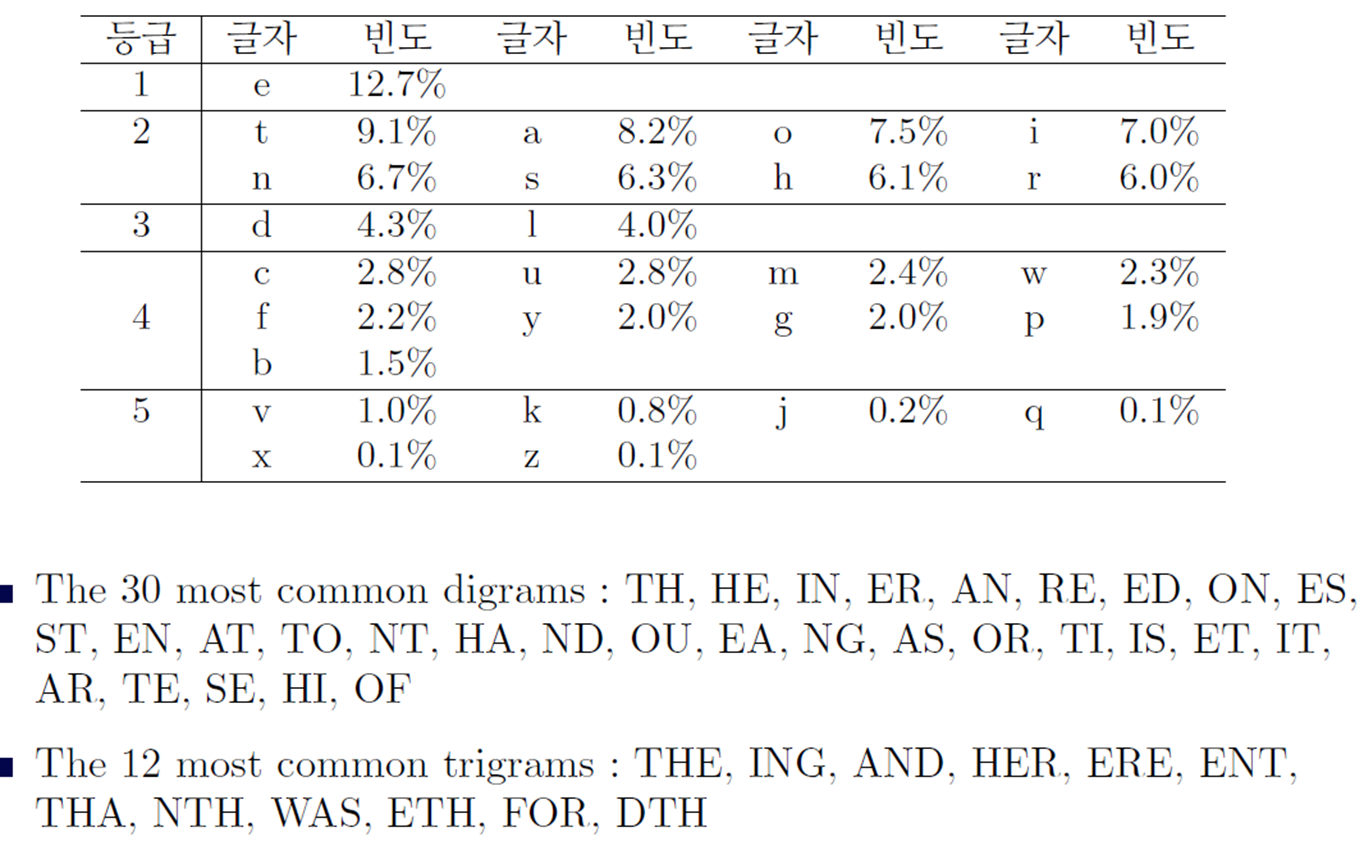 -->
<img src="./image.png" width="800" height="500"/>

* Q => e, E => t라 하면 'ECQ'는 't*e'이므로 'C => h"라 예측할 수 있다.  
예측된 것들은 구분을 위해 소문자로 적을 것이다.

In [ ]:
trans_table = str.maketrans({'Q': 'e', 'E': 't', 'C': 'h'})
updated_text = cipher_text.translate(trans_table)
text_info(updated_text)

[('e', 110), ('t', 105), ('O', 84), ('T', 73), ('Y', 72), ('U', 71), ('B', 66), ('P', 50), ('I', 45), ('A', 40), ('Z', 36), ('D', 31), ('h', 29), ('M', 21), ('S', 20), ('K', 17), ('H', 15), ('R', 14), ('N', 11), ('X', 9), ('G', 8), ('J', 2), ('V', 1), ('L', 1), ('W', 1)]
[('UO', 23), ('th', 22), ('TO', 21), ('Bt', 20), ('eB', 20), ('he', 19), ('tY', 19), ('tT', 18), ('Tt', 17), ('YU', 15)]
[('the', 18), ('YUO', 15), ('tYU', 14), ('TOI', 12), ('BtT', 9), ('TtY', 8), ('UDZ', 7), ('DZI', 7), ('ePe', 7), ('tTO', 6)]
[('ethe', 3), ('eIth', 3), ('Ithe', 4), ('theB', 3), ('Bthe', 3), ('theI', 3), ('eZeAt', 3), ('BeZeAt', 3), ('eZeAtY', 3), ('BeZeAtY', 3)]


* 'ePe'에서 P => r을 추론할 수 있다.  
* Bt와 eB가 모두 많은데, t로 끝나는 것 중에는 it, at, st가 있고, e로 시작하는 것 중에는 ea, es가 있으므로 B => (a or s)임을 알 수 있다.  
* common bigram 중 뒤집어도 있는 것은 'er', 'es', 'ti', 'et'이다. 텍스트에는 'tT', 'tY'가 있다. 따라서 (T or Y) => i임을 추론할 수 있다.  
* in, an, on, nd, ou, ng, as, or, is, ar, of이 'the'가 모두 들어가지 않았다. UO, TO가 많으므로 O => (n or s or r)임을 예측할 수 있다.  
* YUO가 많다. common trigram 중 'ther'가 모두 쓰이지 않은 것은 ing, and, was, for가 있다. 그런데 tYU에서 tfo는 많이 쓰이지 않으므로 for가 아님을 알 수 있다. 또한 w의 빈도수는 낮으므로 Y => (i or a)임을 예측할 수 있다.  
### 정리
* P => r, B => (a or s), (T or Y) => i, O => (n or s or r), Y => (i or a)  
알 수 있는 것이 별로 없으므로 Y => i임을 가정해보자..


In [4]:
trans_table.update(str.maketrans({'P': 'r', 'Y': 'i'}))
updated_text = cipher_text.translate(trans_table)
text_info(updated_text)
display(updated_text)

[('e', 110), ('t', 105), ('O', 84), ('T', 73), ('i', 72), ('U', 71), ('B', 66), ('r', 50), ('I', 45), ('A', 40), ('Z', 36), ('D', 31), ('h', 29), ('M', 21), ('S', 20), ('K', 17), ('H', 15), ('R', 14), ('N', 11), ('X', 9), ('G', 8), ('J', 2), ('V', 1), ('L', 1), ('W', 1)]
[('UO', 23), ('th', 22), ('TO', 21), ('Bt', 20), ('eB', 20), ('he', 19), ('ti', 19), ('tT', 18), ('Tt', 17), ('iU', 15)]
[('the', 18), ('iUO', 15), ('tiU', 14), ('TOI', 12), ('BtT', 9), ('Tti', 8), ('UDZ', 7), ('DZI', 7), ('ere', 7), ('tTO', 6)]
[('ethe', 3), ('eZeAti', 3), ('BeZeAti', 3), ('eZeAtiU', 3), ('eOArKSti', 3), ('BeZeAtiU', 3), ('eZeAtiUO', 3), ('eOArKStiU', 3), ('rKStiUOBt', 3), ('tiUOSrUAe', 3)]


'iOVTODTrKtheDBOTtiUOTZiOBtitDteUHBtTOITrIBTOIteAhOUZUXKTOOUDOAeItheBtTrtUHTOiOitiTtiGetUIeGeZUSTOeNeOArKStiUOBtTOITrItheTeBtheOeNeOArKStiUOBtTOITrINTBtUReAUMeTHeIerTZiOHUrMTtiUOSrUAeBBiOXBtTOITrIreSZTAiOXtheUZIITtTeOArKStiUOBtTOITrITOItriSZeIeBDOZiJetheBeZeAtiUOSrUAeBBHUrtheIeBtheBeADrehTBhTZXUrithMTOItheIiXitTZBiXOTtDreTZXUrithMOiBthTITOOUDOAeIthTttheTeBBeZeAtiUOSrUAeBBNUDZIReUSeOTOKUOeAUDZIBDRMitTATOIiITteAiShereTAhBDRMiBBiUOSrUGiIeIitMetthereLDireMeOtBNUDZIReAUOBiIereIUOitBMeritBOiBtNUDZIOUtSerHUrMTOKBeADritKUreHHiAieOAKeGTZDTtiUOitBeZHRDtiOBteTIiOGiteItheArKStUZUXKAUMMDOitKtUMUDOtTttTAJBTOItrKtUArKStTOTZKWetheIiHHereOtATOIiITteBTOITOKUOeNhUNTBiOtereBteItUeGTZDTteiMSZeMeOtTtiUOAUBtTZZreBDZtBAUDZIReBeOttUOiBtTBSDRZiAAUMMeOtBHUrSDRZiATtiUOUOtheOiBtTeBNeRBiteUrReBDRMitteIHUrSreBeOtTtiUOTtTeBAUOHereOAeBOiBtNUDZIMereZKAUZZeAtAUOtriRDtiUOBDBiOXtheMTBtheRTBiBHUrtheirBeZeAtiUOOiBtNUDZIMUtiGTtetheirAhUiAeBiOeGTZDTtiUOreSUrtB'

이제 TOI는 and나 was가 될 수 있으므로 일단 and라고 가정하자. 그러면 B => s인 것도 자동으로 나온다.

In [5]:
trans_table.update(str.maketrans({'T': 'a', 'O': 'n', 'I': 'd', 'B': 's'}))
updated_text = cipher_text.translate(trans_table)
text_info(updated_text)

[('e', 110), ('t', 105), ('n', 84), ('a', 73), ('i', 72), ('U', 71), ('s', 66), ('r', 50), ('d', 45), ('A', 40), ('Z', 36), ('D', 31), ('h', 29), ('M', 21), ('S', 20), ('K', 17), ('H', 15), ('R', 14), ('N', 11), ('X', 9), ('G', 8), ('J', 2), ('V', 1), ('L', 1), ('W', 1)]
[('Un', 23), ('th', 22), ('an', 21), ('st', 20), ('es', 20), ('he', 19), ('ti', 19), ('ta', 18), ('at', 17), ('iU', 15)]
[('the', 18), ('iUn', 15), ('tiU', 14), ('and', 12), ('sta', 9), ('ati', 8), ('UDZ', 7), ('DZd', 7), ('ere', 7), ('tan', 6)]
[('tiUnstandar', 3), ('iUnstandard', 3), ('nstandard', 3), ('tiUnstanda', 3), ('iUnstandar', 3), ('Unstandard', 3), ('StiUnstanda', 3), ('standard', 5), ('nstandar', 3), ('tiUnstand', 3)]


* initiatiGe를 통해 G => v임을 알 수 있다.  
* Un이 많으므로 U => o임을 알 수 있다.

In [6]:
trans_table.update(str.maketrans({'G': 'v', 'U': 'o'}))
updated_text = cipher_text.translate(trans_table)
text_info(updated_text)
print(updated_text)

[('e', 110), ('t', 105), ('n', 84), ('a', 73), ('i', 72), ('o', 71), ('s', 66), ('r', 50), ('d', 45), ('A', 40), ('Z', 36), ('D', 31), ('h', 29), ('M', 21), ('S', 20), ('K', 17), ('H', 15), ('R', 14), ('N', 11), ('X', 9), ('v', 8), ('J', 2), ('V', 1), ('L', 1), ('W', 1)]
[('on', 23), ('th', 22), ('an', 21), ('st', 20), ('es', 20), ('he', 19), ('ti', 19), ('ta', 18), ('at', 17), ('io', 15)]
[('the', 18), ('ion', 15), ('tio', 14), ('and', 12), ('sta', 9), ('ati', 8), ('oDZ', 7), ('DZd', 7), ('ere', 7), ('tan', 6)]
[('tionstandar', 3), ('ionstandard', 3), ('tionstanda', 3), ('ionstandar', 3), ('onstandard', 3), ('Stionstanda', 3), ('tionstand', 3), ('ionstanda', 3), ('onstandar', 3), ('nstandard', 3)]
inVanDarKtheDsnationaZinstitDteoHstandardsandteAhnoZoXKannoDnAedthestartoHaninitiativetodeveZoSaneNenArKStionstandardtheaestheneNenArKStionstandardNastoReAoMeaHederaZinHorMationSroAessinXstandardreSZaAinXtheoZddataenArKStionstandardandtriSZedesDnZiJetheseZeAtionSroAessHorthedestheseADrehasha

nationaZ, institDte, teAhnoZoXK, annoDnAed, the start oH an, deveZoS#, eNenArKStion  
Z => l, D => u, A => c, X => g, K => y, D => u, A => c, H => f, S => p

In [7]:
trans_table.update(str.maketrans({'Z': 'l', 'D': 'u', 'A': 'c', 'X': 'g', 'K': 'y', 'H': 'f', 'S': 'p'}))
updated_text = cipher_text.translate(trans_table)
updated_text = updated_text.replace('Z', 'l').replace("D", 'u').replace("A", 'c').replace("X", 'g').replace("K", 'y').replace("D", 'u').replace("H", 'f').replace("S", 'p')
text_info(updated_text)
print(updated_text)

[('e', 110), ('t', 105), ('n', 84), ('a', 73), ('i', 72), ('o', 71), ('s', 66), ('r', 50), ('d', 45), ('c', 40), ('l', 36), ('u', 31), ('h', 29), ('M', 21), ('p', 20), ('y', 17), ('f', 15), ('R', 14), ('N', 11), ('g', 9), ('v', 8), ('J', 2), ('V', 1), ('L', 1), ('W', 1)]
[('on', 23), ('th', 22), ('an', 21), ('st', 20), ('es', 20), ('he', 19), ('ti', 19), ('ta', 18), ('at', 17), ('io', 15)]
[('the', 18), ('ion', 15), ('tio', 14), ('and', 12), ('sta', 9), ('ati', 8), ('oul', 7), ('uld', 7), ('ere', 7), ('tan', 6)]
[('encryptions', 3), ('ncryptionst', 3), ('cryptionsta', 3), ('ryptionstan', 3), ('yptionstand', 3), ('ptionstanda', 3), ('tionstandar', 3), ('ionstandard', 3), ('tionprocess', 3), ('encryption', 3)]
inVanuarytheusnationalinstituteofstandardsandtechnologyannouncedthestartofaninitiativetodevelopaneNencryptionstandardtheaestheneNencryptionstandardNastoRecoMeafederalinforMationprocessingstandardreplacingtheolddataencryptionstandardandtripledesunliJetheselectionprocessforthedesthes

in Vanuary the us national institute of standards and technology announced the start of an initiative to develop an eNencryption standard the aes the neN encryption standard Nas to RecoMea federal inforMation processing standard replacing the old data encryption standard and triple des unliJe the selection process for the des these cure hashalgorithM and the digital signature algorithM nist had announced that the aes selection process Nould Re open anyone could suRMit a candidate cipher each suRMission provided it Met the reLuireMents Nould Re considered on its Merits nist Nould not per for Many security or efficiency evaluation itself Rut instead invited the cryptology coMMunity to Mount attacJs and try to cryptanalyWe the different candidates and anyone Nho Nas interested to evaluate iMpleMentation cost all results could Re sent to nist as puRlic coMMents for puRlication on then zist aes NeRsite or ResuRMitted for presentation at aes conferences nist Nould Merely collect contriRutions using the Masthe Rasis for their selection nist Nould Motivate their choices in evaluation reports  
  
위 결과를 토대로 단어를 유추하면 아래와 같이 알 수 있다.
V => j, N => w, M=>m, J=>k, R=>b, W=z, L=>q

In [8]:
trans_table.update(str.maketrans({'V': 'j', 'N': 'w', 'M': 'm', 'J': 'k', 'R': 'b', 'W': 'z', 'L': 'q'}))
updated_text = cipher_text.translate(trans_table)
updated_text = updated_text.replace('V', 'j').replace("N", 'w').replace("M", 'm').replace("J", 'k').replace("R", 'b').replace("W", 'z').replace("L", 'q')
print(updated_text)


injanuarytheusnationalinstituteofstandardsandtechnologyannouncedthestartofaninitiativetodevelopanewencryptionstandardtheaesthenewencryptionstandardwastobecomeafederalinformationprocessingstandardreplacingtheolddataencryptionstandardandtripledesunliketheselectionprocessforthedesthesecurehashalgorithmandthedigitalsignaturealgorithmnisthadannouncedthattheaesselectionprocesswouldbeopenanyonecouldsubmitacandidateciphereachsubmissionprovideditmettherequirementswouldbeconsideredonitsmeritsnistwouldnotperformanysecurityorefficiencyevaluationitselfbutinsteadinvitedthecryptologycommunitytomountattacksandtrytocryptanalyzethedifferentcandidatesandanyonewhowasinterestedtoevaluateimplementationcostallresultscouldbesenttonistaspubliccommentsforpublicationonthenistaeswebsiteorbesubmittedforpresentationataesconferencesnistwouldmerelycollectcontributionsusingthemasthebasisfortheirselectionnistwouldmotivatetheirchoicesinevaluationreports


마지막으로 `cipher_text`에 없는 'F'를 키값으로 나오지 않은 'x'로 매칭해주자.

In [9]:
trans_table.update(str.maketrans({'F': 'x'}))
key = ''.join(map(lambda x: x[1], sorted(trans_table.items(), key=lambda x: x[0])))
print(key)

cshutxvfdkyqmwnrebpaojzgil


* key: cshutxvfdkyqmwnrebpaojzgil  
* plain_text: injanuarytheusnationalinstituteofstandardsandtechnologyannouncedthestartofaninitiativetodevelopanewencryptionstandardtheaesthenewencryptionstandardwastobecomeafederalinformationprocessingstandardreplacingtheolddataencryptionstandardandtripledesunliketheselectionprocessforthedesthesecurehashalgorithmandthedigitalsignaturealgorithmnisthadannouncedthattheaesselectionprocesswouldbeopenanyonecouldsubmitacandidateciphereachsubmissionprovideditmettherequirementswouldbeconsideredonitsmeritsnistwouldnotperformanysecurityorefficiencyevaluationitselfbutinsteadinvitedthecryptologycommunitytomountattacksandtrytocryptanalyzethedifferentcandidatesandanyonewhowasinterestedtoevaluateimplementationcostallresultscouldbesenttonistaspubliccommentsforpublicationonthenistaeswebsiteorbesubmittedforpresentationataesconferencesnistwouldmerelycollectcontributionsusingthemasthebasisfortheirselectionnistwouldmotivatetheirchoicesinevaluationreports

in january the us national institute of standards and technology announced the start of an initiative to develop an ewencryption standard the aes the new encryption standard was to become a federal information processing standard replacing the old data encryption standard and triple des unlike the selection process for the des these cure hash algorithm and the digital signature algorithm nist had announced that the aes selection process would be open anyone could submit a candidate cipher each submission provided it met the requirements would be considered on its merits nist would not per for many security or efficiency evaluation itself but instead invited the cryptology community to mount attacks and try to cryptanalyze the different candidates and anyone who was interested to evaluate implementation cost all results could be sent to nist as public comments for publication on then zist aes website or besubmitted for presentation at aes conferences nist would merely collect contributions using the masthe basis for their selection nist would motivate their choices in evaluation reports